In [ ]:
!pip install statsmodels
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import collections
pd.set_option('display.max_columns', None)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 3.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Predicting 2023 NBA All Stars 🏀

In [ ]:
main = pd.read_csv('nba2015_22.csv')
main = main.drop(columns = ['wnba_fantasy_pts'], axis = 1)

## Train Test Split

In [ ]:
# train data 2015 - 2021
train = main[main['year'] != 2022]

# test data 2020
test = main[main['year'] == 2022]

dropped_cols = ['player_id', 'player_name', 'team_abbreviation', 'allstar', 'nba_fantasy_pts']

y_train = train['allstar']
X_train = train.drop(dropped_cols, axis = 1)

y_test = test['allstar']
X_test = test.drop(dropped_cols, axis = 1)

## Baseline Model

In [ ]:
# Baseline model that predicts the most frequent outcome for allstar

cm_baseline = confusion_matrix(test['allstar'],[0] * test.shape[0])
accuracy_baseline = (cm_baseline.ravel()[0] + cm_baseline.ravel()[3])/ sum(cm_baseline.ravel())
print("Accuracy baseline = ", accuracy_baseline)

Accuracy baseline =  0.9473684210526315


So there is 95% accuracy in predicting that a given NBA player is NOT an allstar (this is the most frequent outcome). This makes sense since there's roughly 30 all stars in a given season (which is 5% of NBA players in a given season where one season holds around ~520 NBA players).

## Classification Model (Decision Tree Classifier)

In [ ]:
X_train

,age,gp,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,pts,plus_minus,dd2,td3,e_off_rating,e_def_rating,e_net_rating,ast_pct,ast_to,reb_pct,e_tov_pct,efg_pct,ts_pct,usg_pct,pace,pace_per40,pie,year
0,40,38,0.368,14.6,1.4,3.0,0.470,0.0,0.0,0.000,0.4,0.6,0.667,0.4,3.6,3.9,1.6,0.4,0.7,0.3,3.2,1.5,0,0,103.0,96.4,6.6,0.164,3.88,0.135,7.9,0.470,0.491,0.114,96.10,80.08,0.109,2015
1,37,66,0.197,28.2,6.0,16.9,0.358,2.0,7.1,0.285,3.5,4.3,0.826,0.6,3.1,3.7,2.8,2.0,0.9,0.2,17.6,-8.6,2,0,98.3,114.0,-15.8,0.183,1.43,0.063,8.3,0.417,0.469,0.314,98.46,82.05,0.089,2015
2,40,61,0.820,25.2,3.5,7.2,0.488,0.0,0.0,0.000,1.5,2.1,0.702,1.9,5.4,7.3,2.7,1.5,0.8,1.3,8.6,7.0,11,0,107.6,93.8,13.7,0.153,1.81,0.148,12.0,0.488,0.523,0.171,94.41,78.68,0.122,2015
3,39,60,0.550,16.8,2.2,5.7,0.388,1.0,2.8,0.349,1.2,1.4,0.833,0.5,1.9,2.4,0.9,0.6,0.6,0.3,6.6,-0.6,0,0,102.9,106.0,-3.1,0.089,1.60,0.071,7.4,0.474,0.520,0.177,97.16,80.97,0.080,2015
4,38,75,0.507,31.5,6.6,14.8,0.448,1.7,4.6,0.368,3.3,3.7,0.893,0.7,5.8,6.5,1.8,1.1,0.7,0.7,18.3,3.4,10,0,107.7,104.1,3.6,0.096,1.57,0.103,5.8,0.504,0.555,0.249,96.66,80.55,0.134,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,24,5,0.400,14.7,1.2,4.0,0.300,0.4,3.0,0.133,0.0,0.0,0.000,0.4,2.6,3.0,0.4,0.8,0.2,0.0,2.8,-7.0,0,0,99.5,121.4,-21.8,0.043,0.50,0.099,15.4,0.350,0.350,0.148,93.68,78.06,0.022,2021
3702,24,3,0.000,15.3,1.7,4.7,0.357,0.7,2.0,0.333,0.7,0.7,1.000,2.0,3.0,5.0,1.0,0.0,0.0,0.3,4.7,2.7,0,0,118.9,116.3,2.6,0.086,0.00,0.144,0.0,0.429,0.470,0.122,97.64,81.36,0.084,2021
3703,26,19,0.421,11.2,1.3,2.7,0.462,0.7,1.9,0.361,0.6,0.7,0.786,0.6,1.3,1.8,0.4,0.2,0.4,0.2,3.8,-1.6,0,0,109.0,114.1,-5.1,0.050,2.67,0.084,4.3,0.587,0.619,0.118,103.20,86.00,0.063,2021
3704,23,22,0.273,19.1,2.6,4.6,0.574,0.6,1.3,0.448,1.1,1.3,0.828,1.5,2.7,4.2,0.9,1.0,0.3,0.7,7.0,-1.3,1,0,107.1,109.0,-1.9,0.066,0.86,0.106,14.2,0.639,0.672,0.136,100.59,83.83,0.079,2021


In [ ]:
y_train

0       0
1       1
2       0
3       0
4       0
       ..
3701    0
3702    0
3703    0
3704    0
3705    0
Name: allstar, Length: 3706, dtype: int64

In [ ]:
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 100)}

dtc = DecisionTreeClassifier()
cv = KFold(n_splits = 5, random_state = 88, shuffle = True)
dtc_cv = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv = cv, verbose = 0)
dtc_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=88, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
       0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
       0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
       0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
       0.02020202, 0....
       0.06565657, 0.06666667, 0.06767677, 0.06868687, 0.06969697,
       0.07070707, 0.07171717, 0.07272727, 0.07373737, 0.07474747,
       0.07575758, 0.07676768, 0.07777778, 0.07878788, 0.07979798,
       0.08080808, 0.08181818, 0.08282828, 0.08383838, 0.08484848,
       0.08585859, 0.08686869, 0.08787879, 0.08888889, 0.08989899,
       0.09090909, 0.09191919, 0.09292929, 0.09393939, 0.09494949,
       0.0959596 , 0.0969697 , 0.0979798 , 0.0989899 , 0.1       ])},
             scoring='accuracy')

In [ ]:
best_ccp_alpha = dtc_cv.best_params_
print("The best ccp_alpha =", best_ccp_alpha)

The best ccp_alpha = {'ccp_alpha': 0.00101010101010101}


Node count = 29


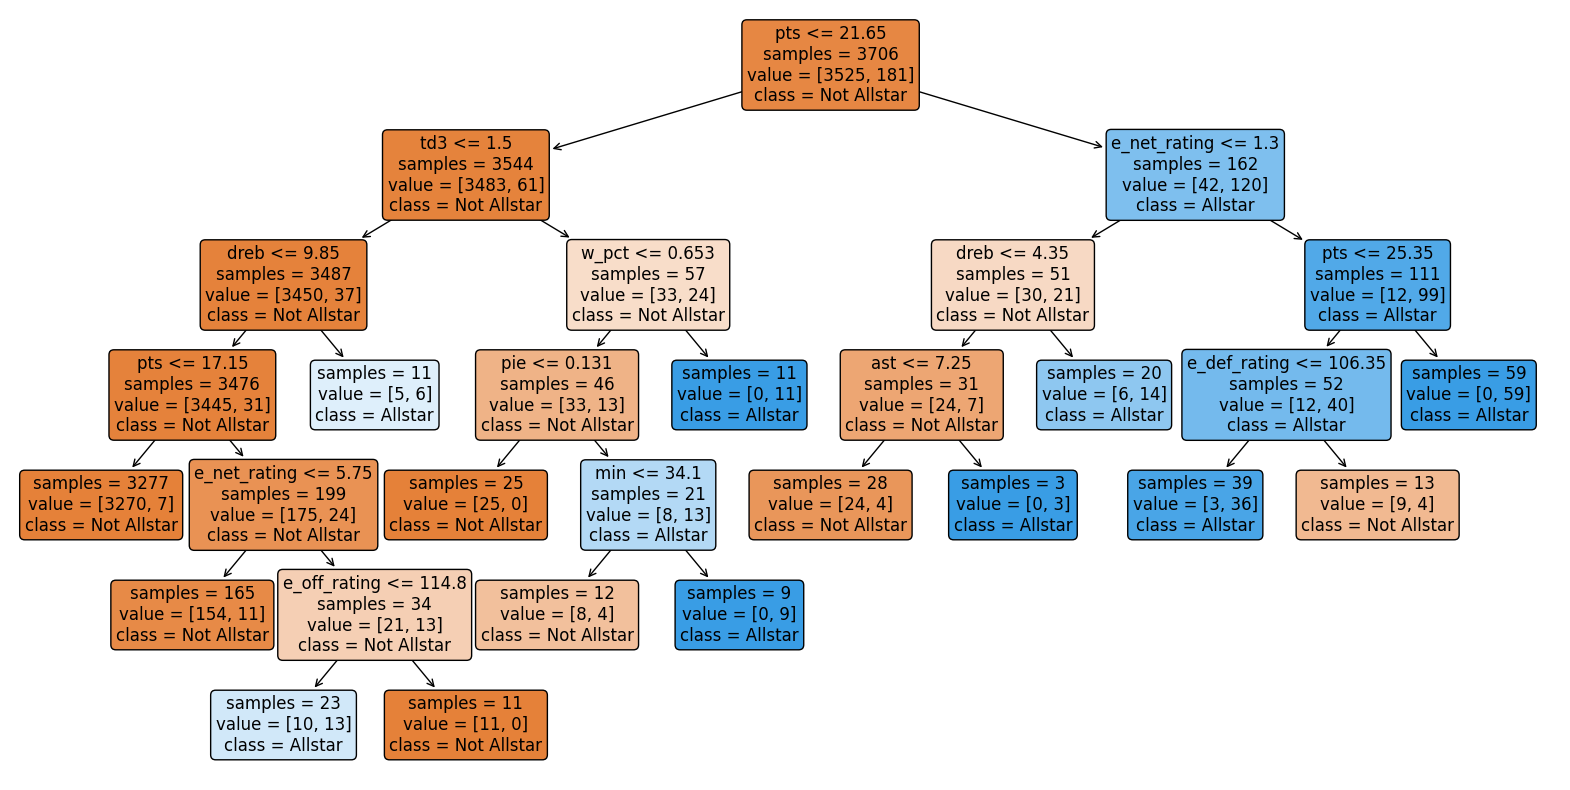

In [ ]:
print('Node count =', dtc_cv.best_estimator_.tree_.node_count)

plt.figure(figsize = (20,10))
plot_tree(dtc_cv.best_estimator_, feature_names = X_train.columns, class_names = ['Not Allstar','Allstar'], filled = True, 
          impurity = False, rounded = True, fontsize = 12, max_depth = 20)
plt.show()

### Interpretation of the Tree

Each split in the decision tree is denoted by the first line of every node. For the root node, the split starts at **pts <= 21.7** We see that 128 players have scored equal or more than 21.7 points in a season and the remaining 2561 have not. Then the decision tree flows into the next depth with splits at **td3 <= 1.5** (td3 = triple doubles) and **e_net_rating <= 1.3** (e_net_rating = effective net rating). Triple doubles are a stat in basketball where a player accumulates double digits in the any of the following categories: points, assists, rebounds, steals, blocks within a game. Net Rating is an advanced NBA statistic that measures a team's or player's point differential per 100 possessions. It is calculated by subtracting the Defensive Rating from the Offensive Rating.

**Fun fact:** Russell Westbrook of the Los Angeles Lakers averaged a triple double for 3 straight seasons. There was only ever one player who averaged a triple double and his name is Oscar Robertson (back in 1974).   

**So, in the perspective of a hypertuned best_estimator Decision Tree, it seems like in order to become an allstar, an NBA player should focus on his offensive scoring (scoring more than 21 points) and have a strong effective net rating.**

In [ ]:
y_pred_dtc_be = dtc_cv.best_estimator_.predict(X_test)
dtc_be_acc = metrics.accuracy_score(y_test, y_pred_dtc_be)
print("Accuracy on test set:", dtc_be_acc)

Accuracy on test set: 0.9688109161793372


## Decision Tree Classifier (Basic, no GridSearch Cross-Validation) 

In [ ]:
dtc2 = DecisionTreeClassifier(ccp_alpha=0.0008)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0008)

Node count = 41


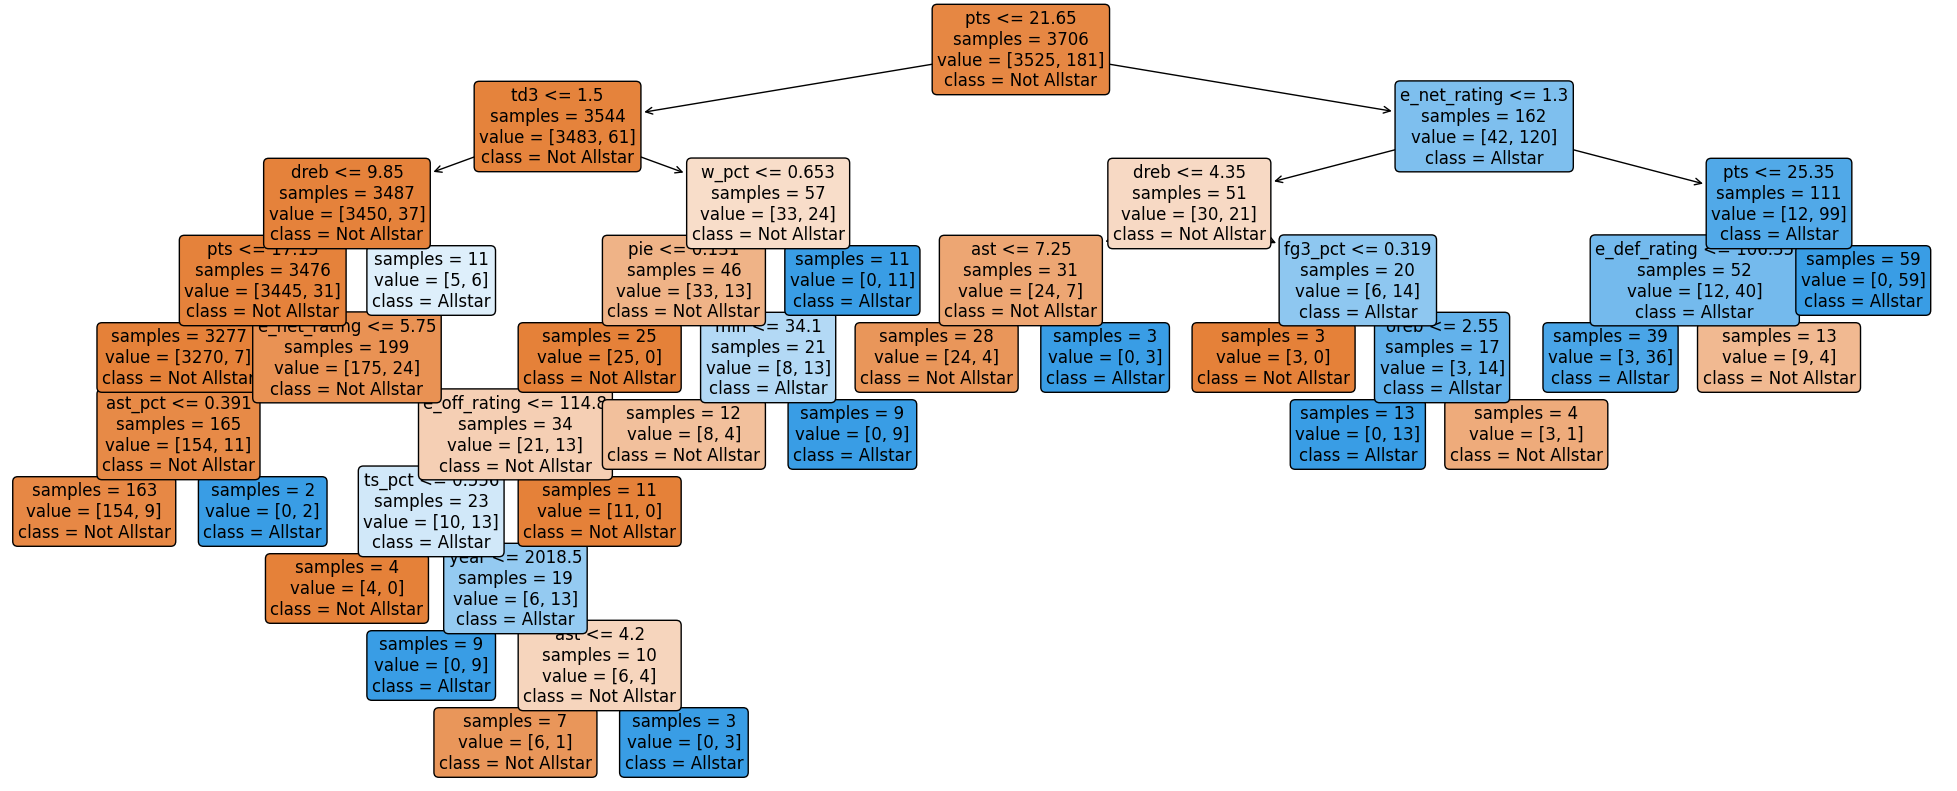

In [ ]:
print('Node count =', dtc2.tree_.node_count)
plt.figure(figsize = (25,10))
plot_tree(dtc2, feature_names = X_train.columns, class_names = ['Not Allstar','Allstar'], filled = True, 
          impurity = False, rounded = True, fontsize = 12, max_depth = 20)
plt.show()

### Interpretation of the Tree

In [ ]:
y_pred_dtc = dtc2.predict(X_test)
norm_dtc_acc = metrics.accuracy_score(y_test, y_pred_dtc)
print("Accuracy:", norm_dtc_acc)

Accuracy: 0.9727095516569201


## Logistic Regression (Binary Classification) Model

Before I implement the logistic regression model, I'd like to use my VIF function to see which features I should use and also see which features are correlated.
VIF Rule of thumb:
- VIF > 10: definitely a problem
- VIF > 5: could be a problem
- VIF <= 5: probably okay

In [ ]:
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

# include any features you want to try out, for now I inserted all of them

cols = X_train.columns
VIF(X_train, cols)

age                  1.146639
gp                   2.297267
w_pct                1.469999
min                 26.024133
fgm               3647.192218
fga                131.037018
fg_pct              35.804279
fg3m               166.950926
fg3a                53.108098
fg3_pct              2.693530
ftm                370.889289
fta                 55.332473
ft_pct               2.322343
oreb               257.333018
dreb              1531.890473
reb               2686.739183
ast                 14.807829
tov                 15.351468
stl                  2.749119
blk                  2.269893
pts               6992.733375
plus_minus           2.720639
dd2                  5.100738
td3                  1.642273
e_off_rating     52271.633937
e_def_rating     44913.464192
e_net_rating     95484.356323
ast_pct              5.655721
ast_to               2.317378
reb_pct              4.692544
e_tov_pct            2.040005
efg_pct             63.008618
ts_pct              33.308944
usg_pct   

<AxesSubplot:>

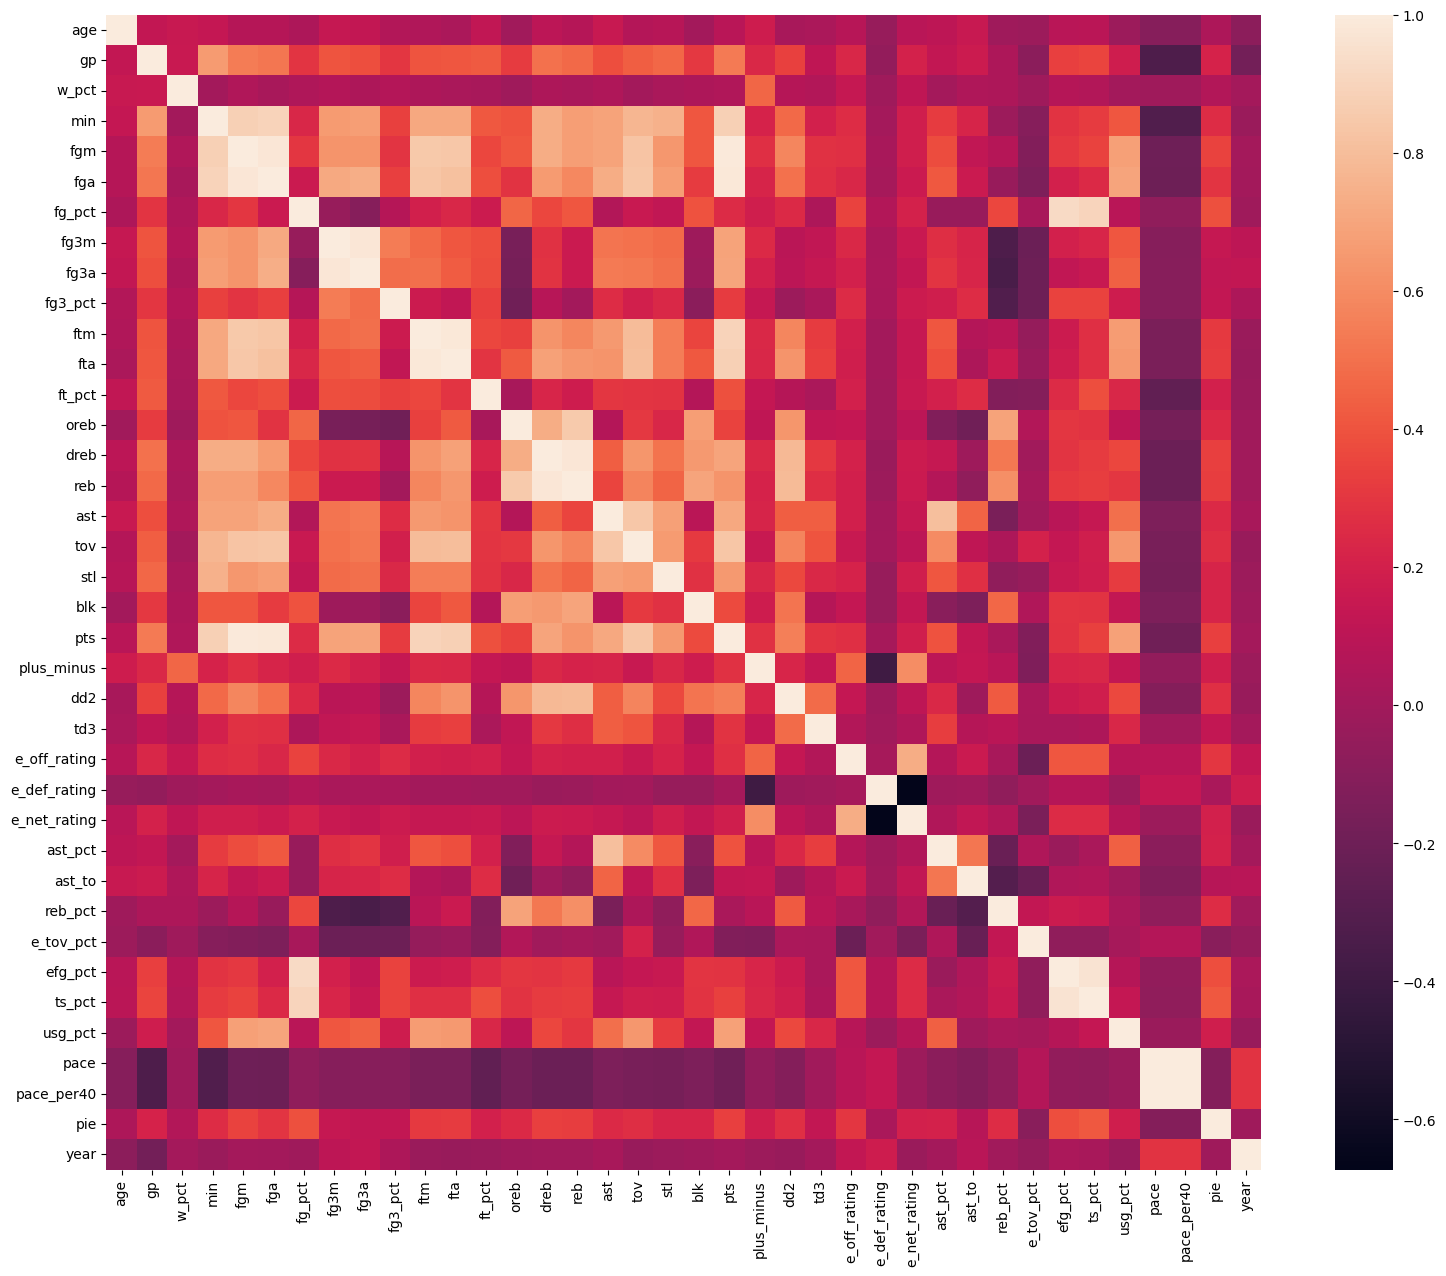

In [ ]:
f = plt.figure(figsize=(19, 15))
features = X_train[X_train.columns] #Subsetting the data
sns.heatmap(features.corr(), square = True) #Plot the correlation as heat map

In [ ]:
logreg = smf.logit(formula = "allstar ~ pts + reb + ast + stl + blk + plus_minus + fg_pct", 
                   data = train)

model_logit = logreg.fit()
print(model_logit.summary())

Optimization terminated successfully.
         Current function value: 0.057097
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                allstar   No. Observations:                 3706
Model:                          Logit   Df Residuals:                     3698
Method:                           MLE   Df Model:                            7
Date:                Thu, 23 May 2024   Pseudo R-squ.:                  0.7073
Time:                        06:07:22   Log-Likelihood:                -211.60
converged:                       True   LL-Null:                       -722.98
Covariance Type:            nonrobust   LLR p-value:                1.455e-216
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.2843      1.507     -7.486      0.000     -14.239      -8.330
pts            0.3523      0

In [ ]:
y_prob = model_logit.predict(X_test)
y_pred = pd.Series([1 if x >= .5 else 0 for x in y_prob], index = y_prob.index)
log_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy on test set:", log_acc)

Accuracy on test set: 0.9805068226120858


## Neural Network Model

In [ ]:
# 21, 26, 37, 46, 48
clf = MLPClassifier(random_state = 21)
clf.fit(X_train, y_train)
y_pred_nn = clf.predict(X_test)
nn_acc_test = metrics.accuracy_score(y_test, y_pred_nn)

## Comparing Accuracy of Models

In [ ]:
print("Test set accuracy for baseline:", accuracy_baseline)
print("Test set accuracy for Decision Trees (best_estimator):", dtc_be_acc)
print("Test set accuracy for Decision Trees (normal):", norm_dtc_acc)
print("Test set accuracy Logistic Regression:", log_acc)
print("Test set accuracy Neural Network (normal):", nn_acc_test)

Test set accuracy for baseline: 0.9473684210526315
Test set accuracy for Decision Trees (best_estimator): 0.9688109161793372
Test set accuracy for Decision Trees (normal): 0.9727095516569201
Test set accuracy Logistic Regression: 0.9805068226120858
Test set accuracy Neural Network (normal): 0.9766081871345029


## Comparing TPR and FPR of each Model

In [ ]:
# Baseline Model TPR/FPR
acc_b = (cm_baseline.ravel()[0]+cm_baseline.ravel()[3])/sum(cm_baseline.ravel())
TPR_b = cm_baseline.ravel()[3]/(cm_baseline.ravel()[3]+cm_baseline.ravel()[2])
FPR_b = cm_baseline.ravel()[1]/(cm_baseline.ravel()[1]+cm_baseline.ravel()[0])

In [ ]:
# Decision Tree (normal) TPR/FPR
cm_dt = confusion_matrix(y_test, y_pred_dtc)
acc_dt = (cm_dt.ravel()[0]+cm_dt.ravel()[3])/sum(cm_dt.ravel())
TPR_dt = cm_dt.ravel()[3]/(cm_dt.ravel()[3]+cm_dt.ravel()[2])
FPR_dt = cm_dt.ravel()[1]/(cm_dt.ravel()[1]+cm_dt.ravel()[0])

In [ ]:
# Decision Tree (best_estimator) TPR/FPR
cm_dt_be = confusion_matrix(y_test, y_pred_dtc_be)
acc_dt_be = (cm_dt_be.ravel()[0]+cm_dt_be.ravel()[3])/sum(cm_dt_be.ravel())
TPR_dt_be = cm_dt_be.ravel()[3]/(cm_dt_be.ravel()[3]+cm_dt_be.ravel()[2])
FPR_dt_be = cm_dt_be.ravel()[1]/(cm_dt_be.ravel()[1]+cm_dt_be.ravel()[0])

In [ ]:
# Logistic Regression TPR/FPR
cm_lr = confusion_matrix(y_test, y_pred)
acc_lr = (cm_lr.ravel()[0]+cm_lr.ravel()[3])/sum(cm_lr.ravel())
TPR_lr = cm_lr.ravel()[3]/(cm_lr.ravel()[3]+cm_lr.ravel()[2])
FPR_lr = cm_lr.ravel()[1]/(cm_lr.ravel()[1]+cm_lr.ravel()[0])

In [ ]:
# NN TPR/FPR
cm_nn = confusion_matrix(y_test, y_pred_nn)
acc_nn = (cm_nn.ravel()[0]+cm_nn.ravel()[3])/sum(cm_nn.ravel())
TPR_nn = cm_nn.ravel()[3]/(cm_nn.ravel()[3]+cm_nn.ravel()[2])
FPR_nn = cm_nn.ravel()[1]/(cm_nn.ravel()[1]+cm_nn.ravel()[0])

## Comparing TPR and FPR of each Model

In [ ]:
print('Decision Tree (best_estimator) TPR:', TPR_dt_be, ', Decision Tree (best_estimator) FPR:', FPR_dt_be)
print('Decision Tree (normal) TPR:', TPR_dt, ', Decision Tree (normal) FPR:', FPR_dt)
print('Logistic Regression TPR:', TPR_lr, ', Logistic Regression FPR:', FPR_lr)
print('Neural Network TPR:', TPR_nn, ', Neural Network FPR:', FPR_nn)

Decision Tree (best_estimator) TPR: 0.6666666666666666 , Decision Tree (best_estimator) FPR: 0.01440329218106996
Decision Tree (normal) TPR: 0.7037037037037037 , Decision Tree (normal) FPR: 0.012345679012345678
Logistic Regression TPR: 0.8518518518518519 , Logistic Regression FPR: 0.012345679012345678
Neural Network TPR: 0.7407407407407407 , Neural Network FPR: 0.0102880658436214


## Predicting who will be an Allstar in the current NBA 2022-23 season

In [ ]:
current = pd.read_csv('nba2022-23.csv')
current = current.drop(columns = ['allstar', 'wnba_fantasy_pts'], axis = 1)
current

,player_id,player_name,team_abbreviation,age,gp,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,pts,plus_minus,nba_fantasy_pts,dd2,td3,e_off_rating,e_def_rating,e_net_rating,ast_pct,ast_to,reb_pct,e_tov_pct,efg_pct,ts_pct,usg_pct,pace,pace_per40,pie,year
0,2544,LeBron James,LAL,38,47,0.511,36.1,11.3,22.6,0.501,2.1,6.9,0.308,4.8,6.3,0.759,1.2,7.2,8.4,6.9,3.1,0.9,0.6,29.5,3.1,51.4,16,1,113.6,111.3,2.3,0.313,2.22,0.114,8.8,0.549,0.583,0.323,102.94,85.78,0.174,2022
1,2617,Udonis Haslem,MIA,42,6,0.500,7.9,0.2,2.0,0.083,0.0,0.3,0.000,0.2,0.3,0.500,0.7,0.7,1.3,0.0,0.0,0.2,0.2,0.5,-4.3,3.1,0,0,99.3,121.7,-22.4,0.000,0.00,0.082,0.0,0.083,0.116,0.111,105.25,87.71,-0.056,2022
2,2738,Andre Iguodala,GSW,39,3,0.333,14.1,1.0,1.3,0.750,0.3,0.7,0.500,0.0,0.0,0.000,0.3,2.0,2.3,1.7,1.7,0.3,0.3,2.3,6.0,8.0,0,0,111.3,89.1,22.2,0.135,1.00,0.074,35.7,0.875,0.875,0.084,108.60,90.50,0.053,2022
3,101108,Chris Paul,PHX,37,43,0.535,32.1,4.7,11.1,0.425,1.6,4.2,0.370,2.5,3.0,0.817,0.4,3.8,4.2,9.0,2.1,1.6,0.4,13.5,1.2,35.8,13,0,113.1,110.4,2.7,0.395,4.30,0.064,8.9,0.495,0.541,0.197,97.39,81.16,0.129,2022
4,200752,Rudy Gay,UTA,36,48,0.521,14.5,1.8,4.9,0.371,0.5,2.2,0.231,0.8,0.9,0.878,0.6,2.4,3.0,1.0,0.6,0.4,0.3,4.9,2.1,11.4,0,0,112.1,105.6,6.5,0.087,1.48,0.097,9.3,0.422,0.463,0.168,102.62,85.52,0.068,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,1631298,Jack White,DEN,25,15,0.800,3.2,0.5,1.1,0.438,0.2,0.5,0.375,0.1,0.2,0.667,0.2,0.3,0.5,0.1,0.1,0.1,0.1,1.3,-2.0,2.6,0,0,94.8,123.1,-28.3,0.071,2.00,0.088,4.9,0.531,0.548,0.153,98.91,82.42,0.063,2022
509,1631306,Cole Swider,LAL,23,6,0.167,6.7,0.5,1.5,0.333,0.5,1.3,0.375,0.0,0.0,0.000,0.2,1.0,1.2,0.7,0.0,0.0,0.0,1.5,0.5,3.9,0,0,119.7,117.4,2.3,0.105,0.00,0.089,0.0,0.500,0.500,0.090,106.14,88.45,0.055,2022
510,1631309,Trevor Hudgins,HOU,23,5,0.000,5.7,0.4,1.8,0.222,0.4,1.6,0.250,0.6,0.6,1.000,0.0,0.0,0.0,0.6,0.2,0.0,0.0,1.8,0.6,2.5,0,0,107.3,98.2,9.1,0.176,3.00,0.000,7.0,0.333,0.436,0.177,97.41,81.18,0.032,2022
511,1631320,Chima Moneke,SAC,27,2,0.500,4.0,0.5,1.0,0.500,0.0,0.0,0.000,0.0,1.0,0.000,1.0,0.0,1.0,0.5,1.0,0.0,0.0,1.0,-4.5,2.0,0,0,82.5,128.8,-46.3,0.250,0.50,0.143,34.0,0.500,0.347,0.250,105.90,88.25,-0.105,2022


In [ ]:
# Logistic Regression method
# Selected a threshold value of .625 to po 

y_prob = model_logit.predict(current)
y_pred = pd.Series([1 if x >= .575 else 0 for x in y_prob], index = y_prob.index)
current['allstar_logit'] = y_pred
predicted_allstars_logit = current[current['allstar_logit'] == 1]
predicted_allstars_logit

,player_id,player_name,team_abbreviation,age,gp,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,pts,plus_minus,nba_fantasy_pts,dd2,td3,e_off_rating,e_def_rating,e_net_rating,ast_pct,ast_to,reb_pct,e_tov_pct,efg_pct,ts_pct,usg_pct,pace,pace_per40,pie,year,allstar_logit
0,2544,LeBron James,LAL,38,47,0.511,36.1,11.3,22.6,0.501,2.1,6.9,0.308,4.8,6.3,0.759,1.2,7.2,8.4,6.9,3.1,0.9,0.6,29.5,3.1,51.4,16,1,113.6,111.3,2.3,0.313,2.22,0.114,8.8,0.549,0.583,0.323,102.94,85.78,0.174,2022,1
7,201142,Kevin Durant,PHX,34,41,0.683,35.6,10.4,18.5,0.563,1.8,4.8,0.381,6.6,7.1,0.932,0.4,6.4,6.8,5.2,3.4,0.8,1.5,29.3,5.5,48.7,5,1,116.8,107.8,9.0,0.238,1.54,0.098,11.3,0.612,0.677,0.309,99.17,82.64,0.187,2022,1
25,201935,James Harden,PHI,33,46,0.652,36.7,6.6,14.5,0.453,2.9,7.3,0.401,5.7,6.5,0.870,0.6,5.6,6.2,10.6,3.5,1.2,0.6,21.7,4.9,46.9,28,4,116.9,110.1,6.8,0.446,3.06,0.089,11.0,0.554,0.626,0.250,96.83,80.69,0.166,2022,1
27,201939,Stephen Curry,GSW,34,38,0.526,34.5,9.8,19.8,0.495,4.9,11.4,0.427,5.0,5.4,0.922,0.6,5.8,6.3,6.4,3.2,1.0,0.4,29.4,4.3,47.6,11,1,116.0,110.7,5.2,0.279,2.00,0.089,10.1,0.619,0.665,0.295,105.35,87.79,0.172,2022,1
30,201950,Jrue Holiday,MIL,32,51,0.765,32.8,7.5,15.9,0.472,2.4,6.4,0.377,2.3,2.7,0.861,1.2,4.0,5.1,7.2,2.9,1.2,0.4,19.8,6.6,38.4,12,0,114.7,107.1,7.7,0.318,2.45,0.073,10.7,0.547,0.577,0.251,102.34,85.29,0.136,2022,1
41,202681,Kyrie Irving,DAL,30,48,0.583,37.0,9.9,20.2,0.491,3.3,8.5,0.381,3.9,4.4,0.887,1.0,4.1,5.1,5.5,2.2,1.1,0.8,27.0,4.2,44.7,5,0,117.5,110.9,6.6,0.232,2.48,0.071,7.5,0.572,0.610,0.289,98.59,82.16,0.145,2022,1
57,203076,Anthony Davis,LAL,29,39,0.462,33.3,9.7,17.4,0.560,0.4,1.5,0.254,6.2,7.7,0.813,3.3,9.1,12.4,2.4,2.2,1.1,2.1,26.1,1.5,52.0,29,0,110.2,108.7,1.5,0.123,1.09,0.176,8.8,0.572,0.629,0.282,103.37,86.14,0.189,2022,1
59,203081,Damian Lillard,POR,32,50,0.480,36.3,9.8,20.7,0.472,4.3,11.2,0.379,8.5,9.3,0.920,0.7,3.7,4.4,7.1,3.2,0.9,0.3,32.3,2.4,48.5,13,1,118.8,115.6,3.2,0.328,2.25,0.063,9.0,0.576,0.653,0.326,99.66,83.05,0.173,2022,1
90,203507,Giannis Antetokounmpo,MIL,28,50,0.760,32.3,11.2,20.7,0.541,0.8,2.9,0.286,8.1,12.5,0.645,2.2,9.7,12.0,5.4,3.9,0.7,0.8,31.3,5.5,54.3,36,3,113.3,106.6,6.7,0.304,1.37,0.170,11.0,0.561,0.598,0.376,103.72,86.44,0.205,2022,1
110,203944,Julius Randle,NYK,28,65,0.585,35.8,8.6,18.4,0.467,2.9,8.2,0.354,5.2,6.9,0.756,2.0,8.4,10.4,4.2,2.8,0.6,0.3,25.3,2.8,44.1,38,0,116.5,113.3,3.3,0.184,1.49,0.143,9.8,0.545,0.590,0.284,97.85,81.54,0.154,2022,1


In [ ]:
# CART model method

dropped_columns = ['player_id', 'player_name', 'team_abbreviation', 'allstar_logit', 'nba_fantasy_pts']
X_test = current.drop(dropped_columns, axis = 1)
y_pred_dtc = dtc_cv.predict(X_test)
current['allstar_dtc'] = y_pred_dtc
predicted_allstars_dtc = current[current['allstar_dtc'] == 1]
predicted_allstars_dtc

/shared-libs-deprecated/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- allstar_dtc
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 39 features, but DecisionTreeClassifier is expecting 38 features as input.

In [ ]:
# Neural Network method
y_pred_nn = clf.predict(X_test)
current['allstar_nn'] = y_pred_nn
predicted_allstars_nn = current[current['allstar_nn'] == 1]
predicted_allstars_nn

/shared-libs-deprecated/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- allstar_dtc
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 39 features, but MLPClassifier is expecting 38 features as input.

## Prediction Output Table

In [ ]:
list1 = predicted_allstars_logit['player_name'].tolist()
list2 = predicted_allstars_dtc['player_name'].tolist()
list3 = predicted_allstars_nn['player_name'].tolist()
list4 = ["Ja Morant", "Kyrie Irving", "Giannis Antetokounmpo", 
                  "Kevin Durant", "Joel Embiid", "DeMar DeRozan",
                   "Julius Randle", "Domantas Sabonis", "Lauri Markkanen", "Shai Gilgeous-Alexander",
                  "Bam Adebayo", "Jaylen Brown", "Anthony Edwards", "De'Aaron Fox", "Jrue Holiday",
                  "Paul George", "Tyrese Haliburton", "Jaren Jackson Jr.", "Pascal Siakam",
                  "Jayson Tatum", "Stephen Curry", "Luka Doncic", 
                  "LeBron James", "Nikola Jokic", "Damian Lillard",
                  "Donovan Mitchell", "Zion Williamson"]

max_len = max(len(list1), len(list2), len(list3), len(list4))

list1 = list1 + [None] * (max_len - len(list1))
list2 = list2 + [None] * (max_len - len(list2))
list3 = list3 + [None] * (max_len - len(list3))

d = {'Logistic Regression': list1, 'Decision Tree Classifier': list2, 'Neural Network': list3,
     'Actual NBA Allstars': list4}

df = pd.DataFrame(data = d)

for column in df.columns:
    df[column] = df[column].sort_values().values
    
df



,Logistic Regression,Decision Tree Classifier,Neural Network,Actual NBA Allstars
0,Anthony Davis,Anthony Davis,Anthony Davis,Anthony Edwards
1,Anthony Edwards,Anthony Edwards,Damian Lillard,Bam Adebayo
2,Damian Lillard,Brandon Ingram,Darius Garland,Damian Lillard
3,Darius Garland,Damian Lillard,DeMar DeRozan,De'Aaron Fox
4,De'Aaron Fox,De'Aaron Fox,Devin Booker,DeMar DeRozan
5,Devin Booker,Desmond Bane,Domantas Sabonis,Domantas Sabonis
6,Domantas Sabonis,Devin Booker,Donovan Mitchell,Donovan Mitchell
7,Donovan Mitchell,Domantas Sabonis,Giannis Antetokounmpo,Giannis Antetokounmpo
8,Giannis Antetokounmpo,Donovan Mitchell,Ja Morant,Ja Morant
9,Ja Morant,Giannis Antetokounmpo,James Harden,Jaren Jackson Jr.


In [0]:
log reg = 22/25 predictions
dtc = 18/25
nn = 20/25

In [ ]:
current[current['player_name'].isin(['James Harden', 'Anthony Davis', 'Trae Young'])]

,player_id,player_name,team_abbreviation,age,gp,w_pct,min,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,tov,stl,blk,pts,plus_minus,nba_fantasy_pts,dd2,td3,e_off_rating,e_def_rating,e_net_rating,ast_pct,ast_to,reb_pct,e_tov_pct,efg_pct,ts_pct,usg_pct,pace,pace_per40,pie,year,allstar_logit,allstar_dtc,allstar_nn
25,201935,James Harden,PHI,33,46,0.652,36.7,6.6,14.5,0.453,2.9,7.3,0.401,5.7,6.5,0.870,0.6,5.6,6.2,10.6,3.5,1.2,0.6,21.7,4.9,46.9,28,4,116.9,110.1,6.8,0.446,3.06,0.089,11.0,0.554,0.626,0.250,96.83,80.69,0.166,2022,1,0,1
57,203076,Anthony Davis,LAL,29,39,0.462,33.3,9.7,17.4,0.560,0.4,1.5,0.254,6.2,7.7,0.813,3.3,9.1,12.4,2.4,2.2,1.1,2.1,26.1,1.5,52.0,29,0,110.2,108.7,1.5,0.123,1.09,0.176,8.8,0.572,0.629,0.282,103.37,86.14,0.189,2022,1,1,1
250,1629027,Trae Young,ATL,24,56,0.536,35.2,8.5,19.8,0.429,2.2,6.6,0.331,7.9,8.8,0.891,0.8,2.3,3.0,10.1,4.1,1.1,0.2,27.0,2.0,45.4,31,0,114.7,113.0,1.7,0.413,2.48,0.041,10.8,0.484,0.571,0.319,104.10,86.75,0.145,2022,1,1,1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=da591482-8a07-4209-b5db-6493489a0a97' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>